In [187]:
import requests
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import numpy as np

from sklearn import preprocessing

import plotly.graph_objects as go # we can not use express plots
from plotly.subplots import make_subplots

In [236]:
CLIENT_ID = pd.read_csv('/Users/ilya/Desktop/keys/spotify_cleint_info.csv')['client_id'].values[0]
CLIENT_SECRET = pd.read_csv('/Users/ilya/Desktop/keys/spotify_cleint_info.csv')['client_secret'].values[0]
PLAYLIST_ID = '7xci2wo1oXG4fh8nxuCvMi'

In [237]:
# API Login
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [238]:
def get_playlist_tracks(username,playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [239]:
tracks = get_playlist_tracks('spotify', PLAYLIST_ID)

track_name_df = pd.DataFrame(columns = ['track_uri','track_name','artist_name'])

for x in tracks:
    row_track_name_df = pd.DataFrame(columns = ['track_uri','track_name','artist_name'])
    row_track_name_df.loc[0] = [x['track']['uri'], x['track']['name'], x['track']['artists'][0]['name']]
    track_name_df = track_name_df.append(row_track_name_df)

track_name_df.head(4)

,track_uri,track_name,artist_name
0,spotify:track:0htCIJB0AHQISL5ygjgBgm,Your Young Voice,Jonny Muir
0,spotify:track:6ueTTzezzvpDXTYeusqNoB,"Nocturnes, Op. 9",Frédéric Chopin
0,spotify:track:7zkDEBSxkcBVsStS4qBFpK,Lisztomania,Phoenix
0,spotify:track:1lOVilzLQuYY2fnFrQ76DK,"Waltz in C-sharp minor, Op. 64 No. 2",Frédéric Chopin


In [180]:
# Getting features of tracks
counter = 0
features = []

for i in track_name_df['track_uri']:
    features = features + sp.audio_features(i)
    counter = counter + 1
    if counter%50 == 0:
        print(counter, end = ' ')

#turning features into a pandas dataframe
features_df = pd.DataFrame(features)

dataset = features_df.merge(track_name_df, left_on = 'uri', right_on = 'track_uri')[['track_uri','track_name','artist_name',
                                                                                     'danceability','energy','loudness',
                                                                                     'speechiness','acousticness','instrumentalness',
                                                                                     'liveness','tempo','valence']]

dataset.head(5)

50 100 150 200 250 

,track_uri,track_name,artist_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,valence
0,spotify:track:0htCIJB0AHQISL5ygjgBgm,Your Young Voice,Jonny Muir,0.572,0.1690,-16.363,0.0355,0.9260,0.00000,0.0961,112.723,0.4350
1,spotify:track:6ueTTzezzvpDXTYeusqNoB,"Nocturnes, Op. 9",Frédéric Chopin,0.375,0.0134,-32.869,0.0377,0.9790,0.90100,0.0832,126.496,0.0778
2,spotify:track:7zkDEBSxkcBVsStS4qBFpK,Lisztomania,Phoenix,0.635,0.7860,-6.460,0.0377,0.0349,0.00767,0.4970,97.540,0.3050
3,spotify:track:1lOVilzLQuYY2fnFrQ76DK,"Waltz in C-sharp minor, Op. 64 No. 2",Frédéric Chopin,0.191,0.0157,-36.252,0.0411,0.9910,0.91600,0.1340,72.701,0.0869
4,spotify:track:2Jj7izAvnOZUHBKCHv3mWk,"Pavane, Op. 50 (Arr. for Cello and Orchestra)",Gabriel Fauré,0.180,0.0272,-26.291,0.0387,0.9610,0.89400,0.1040,77.044,0.0846


In [181]:
dataset.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,valence
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,0.531190,0.444585,-11.202228,0.056440,0.540334,0.168449,0.152253,117.640464,0.425599
std,0.165983,0.251928,6.176989,0.057192,0.339289,0.317437,0.117241,30.685428,0.265788
min,0.097500,0.002650,-36.856000,0.024300,0.000233,0.000000,0.049300,61.494000,0.036000
25%,0.413750,0.257000,-13.559750,0.032550,0.211250,0.000000,0.091925,94.839500,0.207750
50%,0.541500,0.428500,-9.605500,0.039150,0.589500,0.000054,0.113500,114.222000,0.387500
75%,0.657250,0.647500,-6.930500,0.052975,0.848500,0.117750,0.162500,134.602250,0.637750
max,0.923000,0.986000,-1.854000,0.618000,0.996000,0.970000,0.982000,204.520000,0.964000


In [217]:
dataset.sort_values(by = 'danceability', ascending = False).round(2)

,track_uri,track_name,artist_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,valence
201,spotify:track:6GskIhdM6TN6EkPgeSjVfW,Fidelity,Regina Spektor,1.00,0.52,0.88,0.04,0.52,0.00,0.06,0.22,0.70
111,spotify:track:1qDrWA6lyx8cLECdZE7TV7,Somebody That I Used To Know,Gotye,0.93,0.53,0.85,0.02,0.55,0.00,0.05,0.47,0.77
254,spotify:track:1vxw6aYJls2oq3gW0DujAo,Crazy,Gnarls Barkley,0.92,0.59,0.92,0.02,0.05,0.01,0.06,0.35,0.65
153,spotify:track:5DjWWVI3WsxMIvDbr6TSLR,Like That,Black Eyed Peas,0.91,0.70,0.88,0.48,0.08,0.00,0.29,0.35,0.38
77,spotify:track:1FreAz1lmnDi5aKLB6GdFM,Where Is The Love?,Black Eyed Peas,0.89,0.70,0.96,0.27,0.10,0.00,0.09,0.23,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...
79,spotify:track:6NsZucPvDbyARfXLgTpY9u,Nessun Dorma,Giacomo Puccini,0.09,0.48,0.89,0.02,0.91,0.96,0.08,0.26,0.02
38,spotify:track:4bNBm1kXH3lw3mCrUJwCtI,Sartori / Arr. Shearman: Con te partirò,Francesco Sartori,0.08,0.20,0.57,0.03,0.96,0.96,0.09,0.31,0.04
188,spotify:track:69RoAhDqFOiQb2pQvb24Ii,Requiem: Lacrimosa,Wolfgang Amadeus Mozart,0.08,0.10,0.39,0.02,0.94,0.93,0.13,0.49,0.01
258,spotify:track:2yuSbTufkytUj19Lc1nBIR,"Cantabile, MS 109/Op. 17 (Arr. for Cello and G...",Niccolò Paganini,0.08,0.26,0.74,0.03,0.99,0.82,0.06,0.78,0.20


In [184]:
scaler = preprocessing.MinMaxScaler()
dataset[dataset.columns[3:]] = scaler.fit_transform(dataset[dataset.columns[3:]])
dataset.head(4)

,track_uri,track_name,artist_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,valence
0,spotify:track:0htCIJB0AHQISL5ygjgBgm,Your Young Voice,Jonny Muir,0.574803,0.169167,0.585481,0.018865,0.929702,0.000000,0.050177,0.358180,0.429957
1,spotify:track:6ueTTzezzvpDXTYeusqNoB,"Nocturnes, Op. 9",Frédéric Chopin,0.336160,0.010932,0.113908,0.022570,0.982928,0.928866,0.036346,0.454477,0.045043
2,spotify:track:7zkDEBSxkcBVsStS4qBFpK,Lisztomania,Phoenix,0.651121,0.796614,0.868408,0.022570,0.034814,0.007907,0.480004,0.252024,0.289871
3,spotify:track:1lOVilzLQuYY2fnFrQ76DK,"Waltz in C-sharp minor, Op. 64 No. 2",Frédéric Chopin,0.113265,0.013271,0.017256,0.028297,0.994979,0.944330,0.090812,0.078356,0.054849


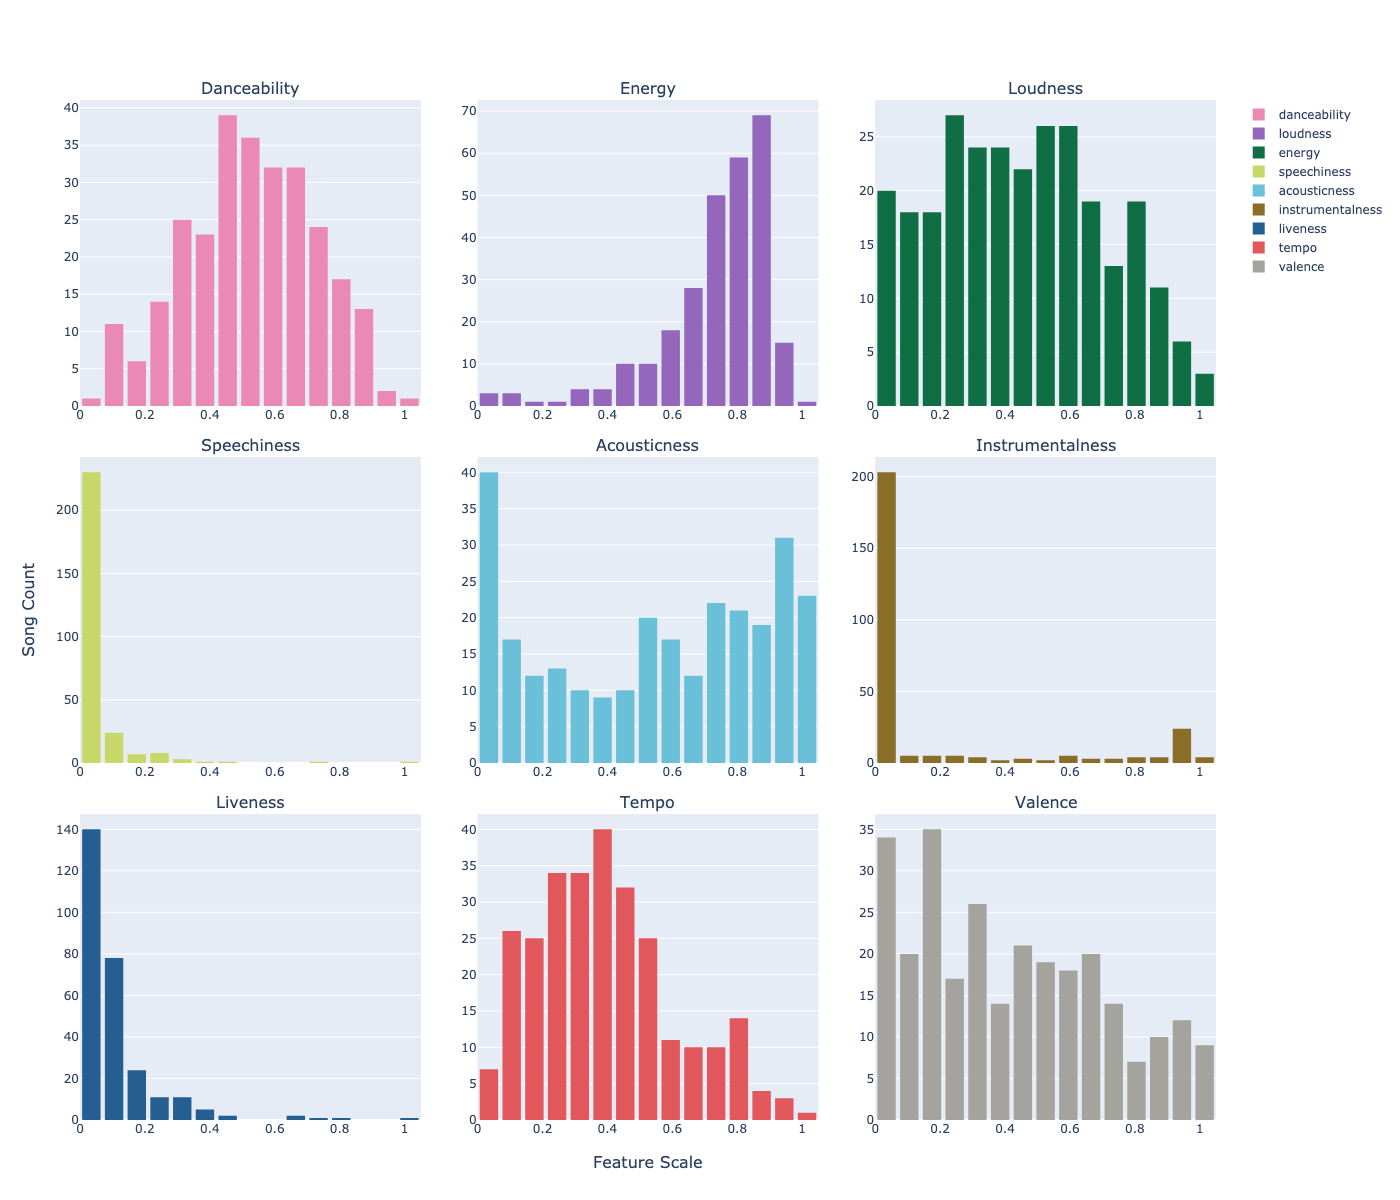

In [223]:
def add_trace_to_suplot(feature, color, row, col):
        return fig.add_trace(go.Histogram(x=dataset[feature],
                           marker_color=color,
                           xbins=dict(
                                    start=0,
                                    end=1.0,
                                    size=0.07),
                            name=feature,              
                            ),row=row, col=col)

fig = make_subplots(rows=3, cols=3,
                        subplot_titles=['Danceability', 'Energy', 'Loudness', 'Speechiness','Acousticness',
                                    'Instrumentalness', 'Liveness', 'Tempo', 'Valence'],
                        x_title='Feature Scale', y_title = 'Song Count',   
                        vertical_spacing = 0.05, horizontal_spacing=0.05)

add_trace_to_suplot('danceability','#EB89B5', 1, 1)

add_trace_to_suplot('loudness','#9467bd', 1, 2)

add_trace_to_suplot('energy','#106e45', 1, 3)

add_trace_to_suplot('speechiness','#C7D869', 2, 1)

add_trace_to_suplot('acousticness','#69C0D8', 2, 2)

add_trace_to_suplot('instrumentalness','#8A6E27', 2, 3)

add_trace_to_suplot('liveness','#255F92', 3, 1)

add_trace_to_suplot('tempo','#E2575B', 3, 2)

add_trace_to_suplot('valence','#A5A39D', 3, 3)

fig.update_layout(
    bargap=0.1, # gap between bars of adjacent location coordinates
    bargroupgap=0.1, # gap between bars of the same location coordinates
    height = 1200, width = 1400,
    paper_bgcolor="white"
    )


fig.show("png", height = 1200, width = 1400)

fig.write_image('spotify_features.png')